In [1]:
from pprint import pprint
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
def make_plot(the_df, field, title, figsize, rotation=None, fontsize=None):
    sns.set_style('whitegrid')
    total = len(the_df[field])*1.
    plt.figure(figsize=figsize)
    ax = sns.countplot(x = field, data = the_df, palette = 'hls' )
    plt.title(title)
    #plt.ylabel('Frequency [%]')
    plt.ylabel('Frequency')
    
    if len(ax.patches)< 8:
        # Format 250 (60%)
        for p in ax.patches:
            ax.annotate('{} ({:.1f}%)'.format(p.get_height(), 100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
    else:
        # Format 60%
        for p in ax.patches:

            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))
        
    #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
    #ax.yaxis.set_ticks(np.linspace(0, total, 11))

    #adjust the ticklabel to the desired format, without changing the position of the ticks
    #_ = ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right", fontsize=fontsize)
    plt.tight_layout()
    plt.show()


In [3]:
xlsx = pd.ExcelFile('Nigerian Graduates Destination Survey (2013 -2017) (Responses) - nigerian graduates survey 2018.xlsx')

In [4]:
graduates_data = pd.read_excel(xlsx, 'Nigerian Graduates Destination ')

In [5]:
# Original shape  (rows and columns)
print(graduates_data.shape)

(5219, 36)


In [6]:
# Remove rows with missing
graduates_data = graduates_data.dropna()

# Show data - head
graduates_data.head()

,Timestamp,What is your gender,Year of graduation,Title of course studied,Polytechnic/University attended,What is your highest level of education?,What best describes your current status?,How many jobs have you had since graduation including your current one?,Have you completed your NYSC?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",...,What currency are you currently paid in?,Approximately how many hours a day do you currently work?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,My course of study prepared me well for further studies,Which of these skills/knowledge did your higher education prepare you for?
4,2018-02-16 13:18:03,Female,2013,Statistics,Ekiti State University,Bachelor's degree,Working full time (paid employment),3,Yes,2016.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,Critical thinking skills
5,2018-02-16 16:44:18,Male,2015,Electrical & Electronic Engineering,University of Benin,Bachelor's degree,Working full time (paid employment),2,No,2013.0,...,Naira,10.0,Capacity,Social media/professional networking sites,No,Car,No: From my current job,Agree,Agree,"Ability to work with others, Knowledge of the ..."
6,2018-02-19 07:24:05,Male,2013,Economics,"Bowen University, Iwo",Higher National Diploma (HND),Working full time (paid employment),4,Yes,2016.0,...,Naira,8.0,Don't know,"University/polytechnic (e.g. Careers Service, ...",Yes: during my higher education study,Commercial Vehicles,No: From my current job,Strongly Disagree,Strongly Disagree,"Critical thinking skills, Ability to work with..."
8,2018-02-19 08:53:52,Female,2017,Industrial Relations and Personnel Management,Covenant University Ota,Bachelor's degree,Youth Corper (NYSC),2,Ongoing,2018.0,...,Naira,9.0,The subject(s) I studied,"Personal contacts, including family and friends",No,Keke Marwa/Napep/Tricycle,No,Agree,Agree,Ability to work with others
10,2018-02-19 09:19:58,Male,2015,Economics,University of Ibadan,Bachelor's degree,Due to start a job in the next month/developin...,3,Yes,2016.0,...,Naira,9.0,No one thing was important,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Strongly Disagree,Strongly Disagree,"Critical thinking skills, Written communicatio..."


In [7]:
# Current shape (rows and columns)

print(graduates_data.shape)


(1229, 36)


In [8]:
gainfully_employed = graduates_data[(graduates_data['What best describes your current status?']=='Working full time (paid employment)') | (graduates_data['What best describes your current status?']=='Youth Corper (NYSC)') | (graduates_data['What best describes your current status?']=='Self-employed/freelance/entrepreneur')]

In [9]:
def label_race(row):
    if row['What best describes your current status?']=='Working full time (paid employment)':
        return "Yes"
    elif row['What best describes your current status?']=='Youth Corper (NYSC)':
        return "Yes"
    elif row['What best describes your current status?']=='Self-employed/freelance/entrepreneur':
        return "Yes"
    else:
        return "No"

graduates_data["Are you gainfully employed?"] = graduates_data.apply (lambda row: label_race (row),axis=1)

In [10]:
graduates_data[['What best describes your current status?', "Are you gainfully employed?"]].head()

,What best describes your current status?,Are you gainfully employed?
4,Working full time (paid employment),Yes
5,Working full time (paid employment),Yes
6,Working full time (paid employment),Yes
8,Youth Corper (NYSC),Yes
10,Due to start a job in the next month/developin...,No


Categories of people gainfully employed are 
Working full time (paid employment) 
Youth Corper (NYSC) 
Self-employed/freelance/entrepreneur


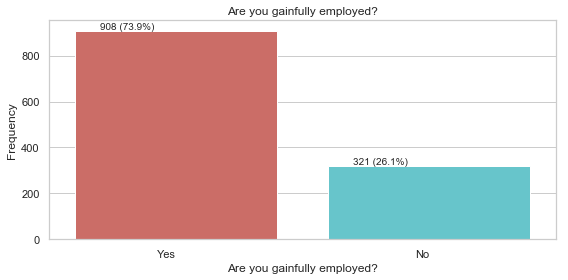

In [11]:
print("Categories of people gainfully employed are \nWorking full time (paid employment) \nYouth Corper (NYSC) \nSelf-employed/freelance/entrepreneur")
make_plot(the_df = graduates_data, field= "Are you gainfully employed?", title="Are you gainfully employed?", figsize=(8,4), rotation=0, fontsize=11)


C:\Users\user\Anaconda3\envs\neuralnets\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


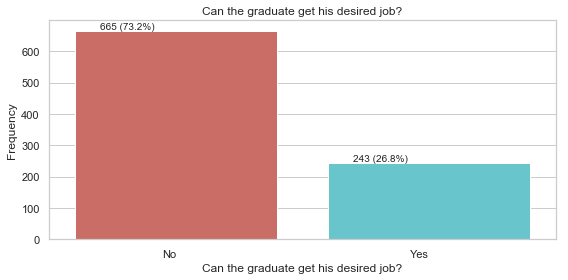

In [12]:
gainfully_employed['Can the graduate get his desired job?'] = np.where((gainfully_employed['What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)'] == gainfully_employed['Which sector is your most preferred sector to work in?']), "Yes", "No")

#Can_the_graduate_get_his_desired_job = gainfully_employed[['Sectors', 'Can the graduate get his desired job?']]

make_plot(the_df = gainfully_employed, field='Can the graduate get his desired job?', title="Can the graduate get his desired job?", figsize=(8, 4), rotation=0, fontsize=11)



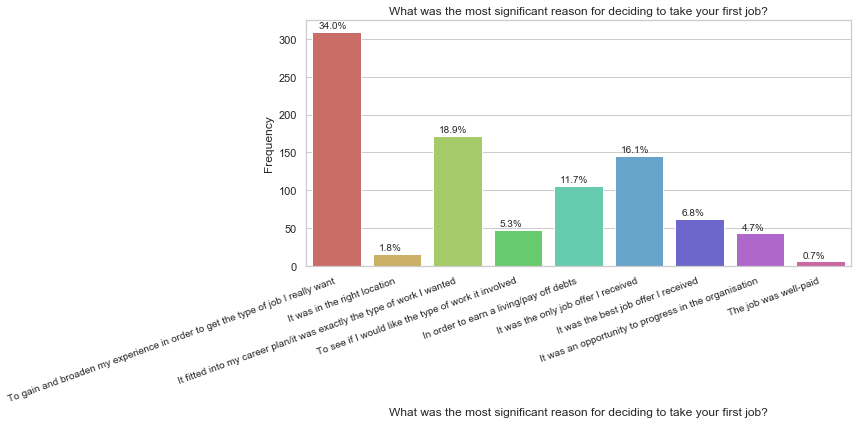

In [13]:
make_plot(the_df = gainfully_employed, field='What was the most significant reason for deciding to take your first job?', title='What was the most significant reason for deciding to take your first job?', figsize=(12, 6), rotation=20)


In [14]:
def simplify_function(the_df, field, frq):
    
    indx = (the_df.groupby(field)[field].count()>frq).index
    bool_value =the_df.groupby(field)[field].count()
    freq = the_df.groupby(field)[field].count().values.tolist()

    indx = list(np.where(bool_value<frq, False, indx))
    freq = np.where(bool_value<frq, False, freq)

    my = (list(indx))
    freqq = list(freq)
    #print(len(freq))

    courses = [same_course for same_course in list(my) if same_course!= False ]
    frequencies = [value for value in freqq if value != False]

    courses_list = [courses[i] for i, number in enumerate(list(frequencies)) for list(courses)[i] in range(number)]
    #print(len(courses_list))
    #print(sum(freq))
    #len(gainfully_employed[['Title of course studied']])
    #alone = np.where(make_titanic[['alone']]==True, 0, 1)

    #sns.countplot(x='Title of course studied', data = gainfully_employed['Title of course studied'].count()>9], palette='hls')
    #plt.show()


    d = {field: courses_list}
    mydf = pd.DataFrame(data=d)

    return mydf


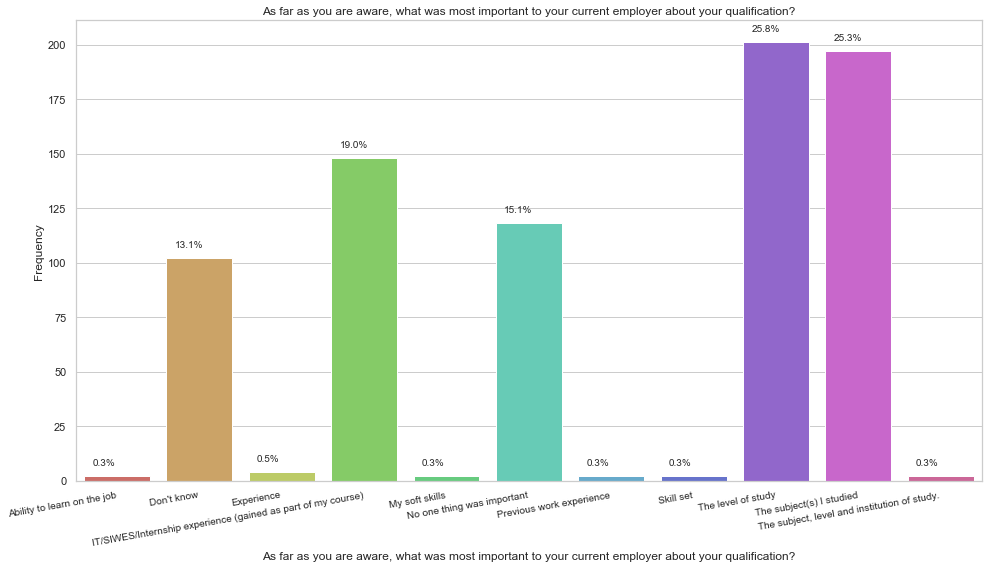

In [15]:
mydf = simplify_function(the_df = gainfully_employed, field='As far as you are aware, what was most important to your current employer about your qualification?', frq=2)
make_plot(the_df = mydf, field='As far as you are aware, what was most important to your current employer about your qualification?', title='As far as you are aware, what was most important to your current employer about your qualification?', figsize=(14, 8), rotation=10)


In [16]:
def label_race1(row):
    items = list(set(mydf.iloc[:, 0].values.tolist()))
    if row['As far as you are aware, what was most important to your current employer about your qualification?']==items[0]:
        return items[0]
    elif row['As far as you are aware, what was most important to your current employer about your qualification?']==items[1]:
        return items[1]
    elif row['As far as you are aware, what was most important to your current employer about your qualification?']==items[2]:
        return items[2]
    elif row['As far as you are aware, what was most important to your current employer about your qualification?']==items[3]:
        return items[3]
    elif row['As far as you are aware, what was most important to your current employer about your qualification?']==items[4]:
        return items[4]
    elif row['As far as you are aware, what was most important to your current employer about your qualification?']==items[5]:
        return items[5]
    elif row['As far as you are aware, what was most important to your current employer about your qualification?']==items[6]:
        return items[6]
    elif row['As far as you are aware, what was most important to your current employer about your qualification?']==items[7]:
        return items[7]
    elif row['As far as you are aware, what was most important to your current employer about your qualification?']==items[7]:
        return items[8]
    elif row['As far as you are aware, what was most important to your current employer about your qualification?']==items[7]:
        return items[9]
    elif row['As far as you are aware, what was most important to your current employer about your qualification?']==items[7]:
        return items[10]
    else:
        return "Others"

#graduates_data["Are you gainfully employed?"] = graduates_data.apply (lambda row: label_race(row),axis=1)

In [17]:
def catch_under_frq(the_df, field, frq):
    
    indx = (the_df.groupby(field)[field].count()<frq).index
    bool_value =the_df.groupby(field)[field].count()
    freq = the_df.groupby(field)[field].count().values.tolist()

    indx = list(np.where(bool_value>frq, False, indx))
    freq = np.where(bool_value>frq, False, freq)

    my = (list(indx))
    freqq = list(freq)
    #print(len(freq))

    courses = [same_course for same_course in list(my) if same_course!= False ]
    frequencies = [value for value in freqq if value != False]

    courses_list = [courses[i] for i, number in enumerate(list(frequencies)) for list(courses)[i] in range(number)]
    #print(len(courses_list))
    #print(sum(freq))
    #len(gainfully_employed[['Title of course studied']])
    #alone = np.where(make_titanic[['alone']]==True, 0, 1)

    #sns.countplot(x='Title of course studied', data = gainfully_employed['Title of course studied'].count()>9], palette='hls')
    #plt.show()


    d = {field: courses_list}
    mydf = pd.DataFrame(data=d)

    return mydf

df_v = catch_under_frq(gainfully_employed, field='As far as you are aware, what was most important to your current employer about your qualification?', frq=3)

formatt = lambda x: "As far as you are aware, what was most important to your current employer about your qualification?"+"_"+x 

new_df_v = df_v['As far as you are aware, what was most important to your current employer about your qualification?'].map(formatt)

noise = list(set(new_df_v.values.tolist()))[:5]

noise01 = list(set(new_df_v.values.tolist()))

noise
#new_df_v

['As far as you are aware, what was most important to your current employer about your qualification?_My enthusiasm and willingness to learn',
 'As far as you are aware, what was most important to your current employer about your qualification?_Academic background and skillset',
 'As far as you are aware, what was most important to your current employer about your qualification?_Experience on field',
 'As far as you are aware, what was most important to your current employer about your qualification?_My level of experience and my will power to grow and do much more than ',
 'As far as you are aware, what was most important to your current employer about your qualification?_My core competencies as related to tge running of a pharmacy']

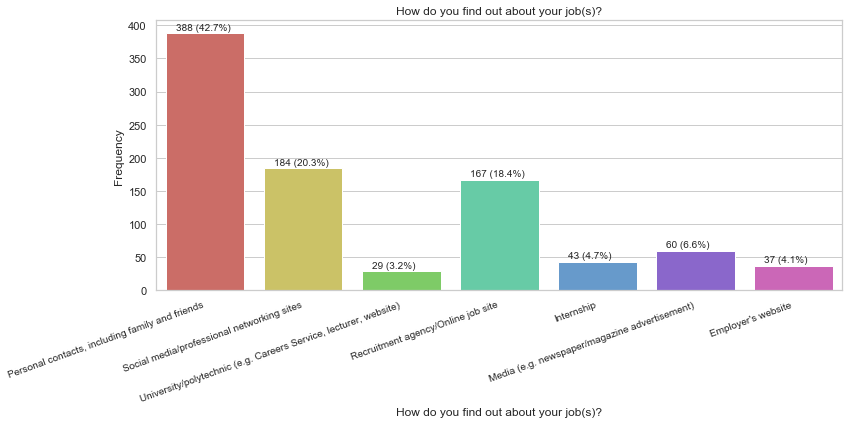

In [18]:
make_plot(the_df = gainfully_employed, field='How do you find out about your job(s)?', title='How do you find out about your job(s)?', figsize=(12, 6), rotation=20)

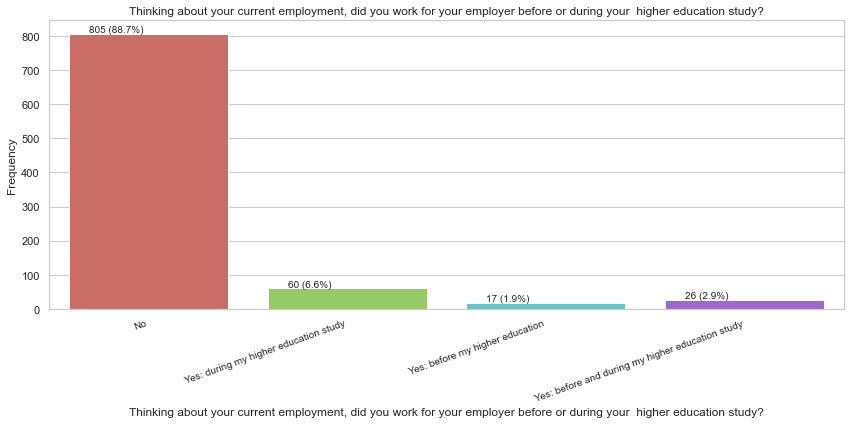

In [19]:
make_plot(the_df = gainfully_employed, field='Thinking about your current employment, did you work for your employer before or during your  higher education study?', title='Thinking about your current employment, did you work for your employer before or during your  higher education study?', figsize=(12, 6), rotation=20)



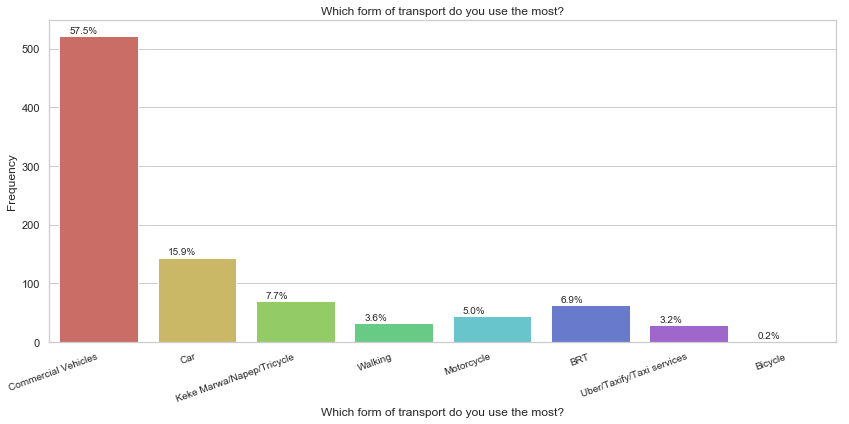

In [20]:
make_plot(the_df = gainfully_employed, field='Which form of transport do you use the most?', title='Which form of transport do you use the most?', figsize=(12, 6), rotation=20)


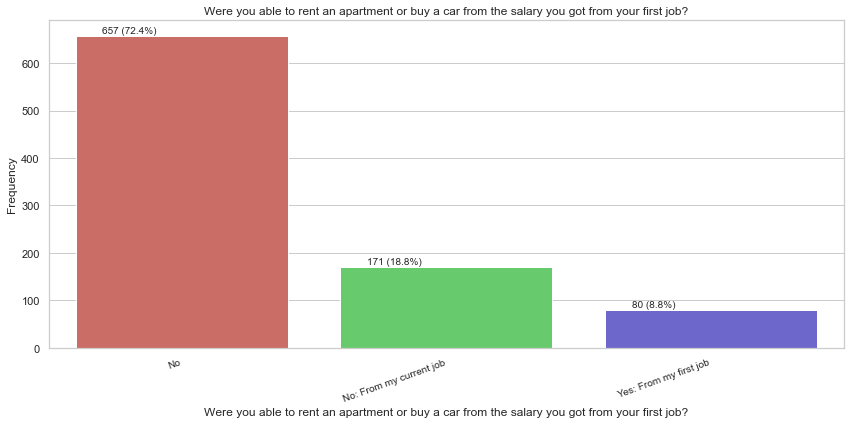

In [21]:
make_plot(the_df = gainfully_employed, field='Were you able to rent an apartment or buy a car from the salary you got from your first job?', title='Were you able to rent an apartment or buy a car from the salary you got from your first job?', figsize=(12, 6), rotation=20)


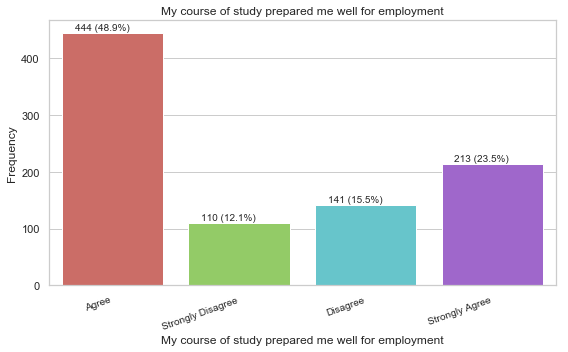

In [22]:
make_plot(the_df = gainfully_employed, field='My course of study prepared me well for employment', title='My course of study prepared me well for employment', figsize=(8, 5), rotation=20)


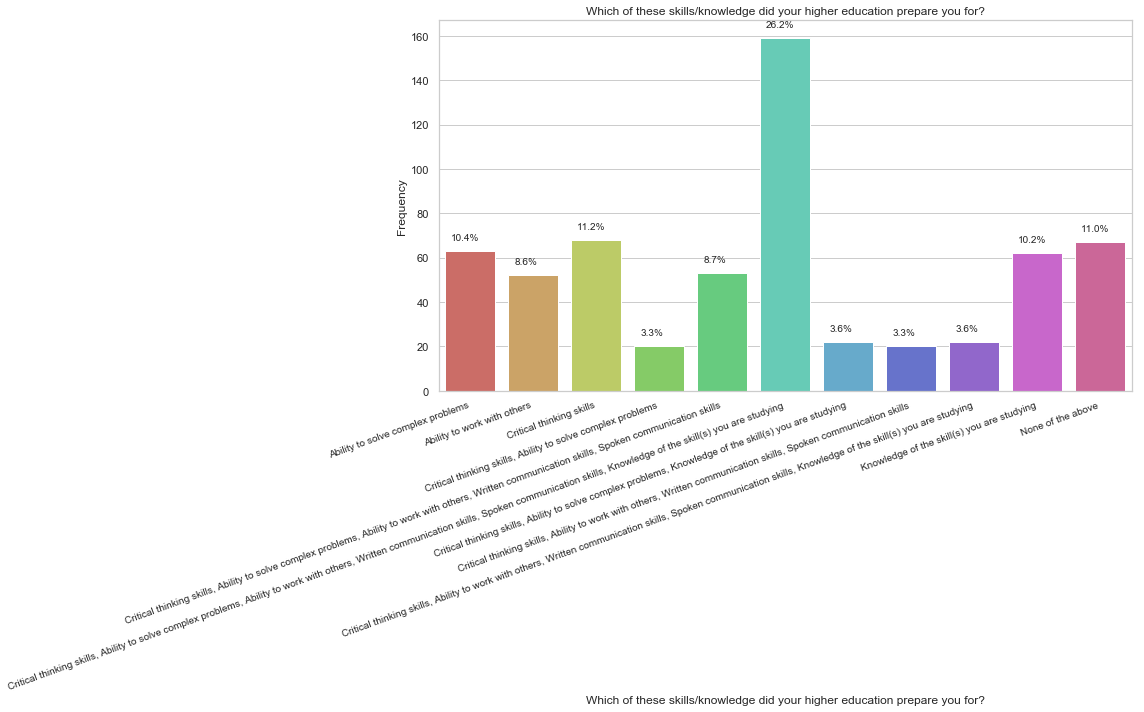

In [23]:
mydf = simplify_function(the_df = gainfully_employed, field='Which of these skills/knowledge did your higher education prepare you for?', frq=20)


make_plot(the_df = mydf, field='Which of these skills/knowledge did your higher education prepare you for?', title='Which of these skills/knowledge did your higher education prepare you for?', figsize=(15, 10), rotation=20)


In [24]:
df_v_02 = catch_under_frq(the_df =  gainfully_employed, field = 'Which of these skills/knowledge did your higher education prepare you for?', frq = 21)

formatt = lambda x: "Which of these skills/knowledge did your higher education prepare you for?"+"_"+x 

new_df_v02 = df_v_02['Which of these skills/knowledge did your higher education prepare you for?'].map(formatt)

noise_ = list(set(new_df_v02.values.tolist()))[:5]

noise02 = list(set(new_df_v02.values.tolist()))

noise_


['Which of these skills/knowledge did your higher education prepare you for?_Critical thinking skills, Ability to solve complex problems, Ability to work with others, Knowledge of the skill(s) you are studying',
 'Which of these skills/knowledge did your higher education prepare you for?_Ability to solve complex problems, Written communication skills, Knowledge of the skill(s) you are studying',
 'Which of these skills/knowledge did your higher education prepare you for?_Critical thinking skills, Ability to solve complex problems, Written communication skills, Spoken communication skills, None of the above',
 'Which of these skills/knowledge did your higher education prepare you for?_Ability to work with others, Written communication skills, Spoken communication skills',
 'Which of these skills/knowledge did your higher education prepare you for?_Critical thinking skills, Ability to solve complex problems, Written communication skills, Spoken communication skills, Knowledge of the skil

In [25]:
data = gainfully_employed
#"Are you gainfully employed?"


In [26]:
data.drop(data.columns[[0,1, 2,3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 34]], axis=1, inplace=True)


C:\Users\user\Anaconda3\envs\neuralnets\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [27]:
data

,What was the most significant reason for deciding to take your first job?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,Which of these skills/knowledge did your higher education prepare you for?,Can the graduate get his desired job?
4,To gain and broaden my experience in order to ...,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Critical thinking skills,No
5,It was in the right location,Capacity,Social media/professional networking sites,No,Car,No: From my current job,Agree,"Ability to work with others, Knowledge of the ...",No
6,It fitted into my career plan/it was exactly t...,Don't know,"University/polytechnic (e.g. Careers Service, ...",Yes: during my higher education study,Commercial Vehicles,No: From my current job,Strongly Disagree,"Critical thinking skills, Ability to work with...",No
8,To gain and broaden my experience in order to ...,The subject(s) I studied,"Personal contacts, including family and friends",No,Keke Marwa/Napep/Tricycle,No,Agree,Ability to work with others,No
11,It fitted into my career plan/it was exactly t...,Don't know,"Personal contacts, including family and friends",Yes: before my higher education,Car,No,Agree,Knowledge of the skill(s) you are studying,No
13,To gain and broaden my experience in order to ...,Don't know,Recruitment agency/Online job site,No,Commercial Vehicles,No,Disagree,"Critical thinking skills, Ability to solve com...",No
16,It fitted into my career plan/it was exactly t...,No one thing was important,"Personal contacts, including family and friends",No,Commercial Vehicles,Yes: From my first job,Strongly Agree,Knowledge of the skill(s) you are studying,Yes
18,To gain and broaden my experience in order to ...,IT/SIWES/Internship experience (gained as part...,Social media/professional networking sites,No,Commercial Vehicles,No,Agree,"Critical thinking skills, Ability to solve com...",Yes
26,To see if I would like the type of work it inv...,professional qualification,"University/polytechnic (e.g. Careers Service, ...",No,Commercial Vehicles,No,Agree,"Ability to solve complex problems, Ability to ...",Yes
27,To see if I would like the type of work it inv...,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Walking,No,Strongly Agree,"Critical thinking skills, Ability to solve com...",Yes


In [28]:
data2 = pd.get_dummies(data, columns =data.columns.values.tolist())
data2['Can the graduate get his desired job?'] = gainfully_employed['Can the graduate get his desired job?'].map({'Yes': 1, 'No': 0})
cols = data2.columns.tolist()
cols = cols[-1:] + cols[:-3]

data2 = data2[cols]  #    OR    df = df.ix[:, cols]


In [29]:
data2

,Can the graduate get his desired job?,What was the most significant reason for deciding to take your first job?_In order to earn a living/pay off debts,What was the most significant reason for deciding to take your first job?_It fitted into my career plan/it was exactly the type of work I wanted,What was the most significant reason for deciding to take your first job?_It was an opportunity to progress in the organisation,What was the most significant reason for deciding to take your first job?_It was in the right location,What was the most significant reason for deciding to take your first job?_It was the best job offer I received,What was the most significant reason for deciding to take your first job?_It was the only job offer I received,What was the most significant reason for deciding to take your first job?_The job was well-paid,What was the most significant reason for deciding to take your first job?_To gain and broaden my experience in order to get the type of job I really want,What was the most significant reason for deciding to take your first job?_To see if I would like the type of work it involved,...,"Which of these skills/knowledge did your higher education prepare you for?_Critical thinking skills, Written communication skills, Spoken communication skills, Knowledge of the skill(s) you are studying",Which of these skills/knowledge did your higher education prepare you for?_Knowledge of the skill(s) you are studying,Which of these skills/knowledge did your higher education prepare you for?_None of the above,Which of these skills/knowledge did your higher education prepare you for?_Spoken communication skills,"Which of these skills/knowledge did your higher education prepare you for?_Spoken communication skills, Knowledge of the skill(s) you are studying",Which of these skills/knowledge did your higher education prepare you for?_Written communication skills,"Which of these skills/knowledge did your higher education prepare you for?_Written communication skills, Knowledge of the skill(s) you are studying","Which of these skills/knowledge did your higher education prepare you for?_Written communication skills, None of the above","Which of these skills/knowledge did your higher education prepare you for?_Written communication skills, Spoken communication skills","Which of these skills/knowledge did your higher education prepare you for?_Written communication skills, Spoken communication skills, Knowledge of the skill(s) you are studying"
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
16,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


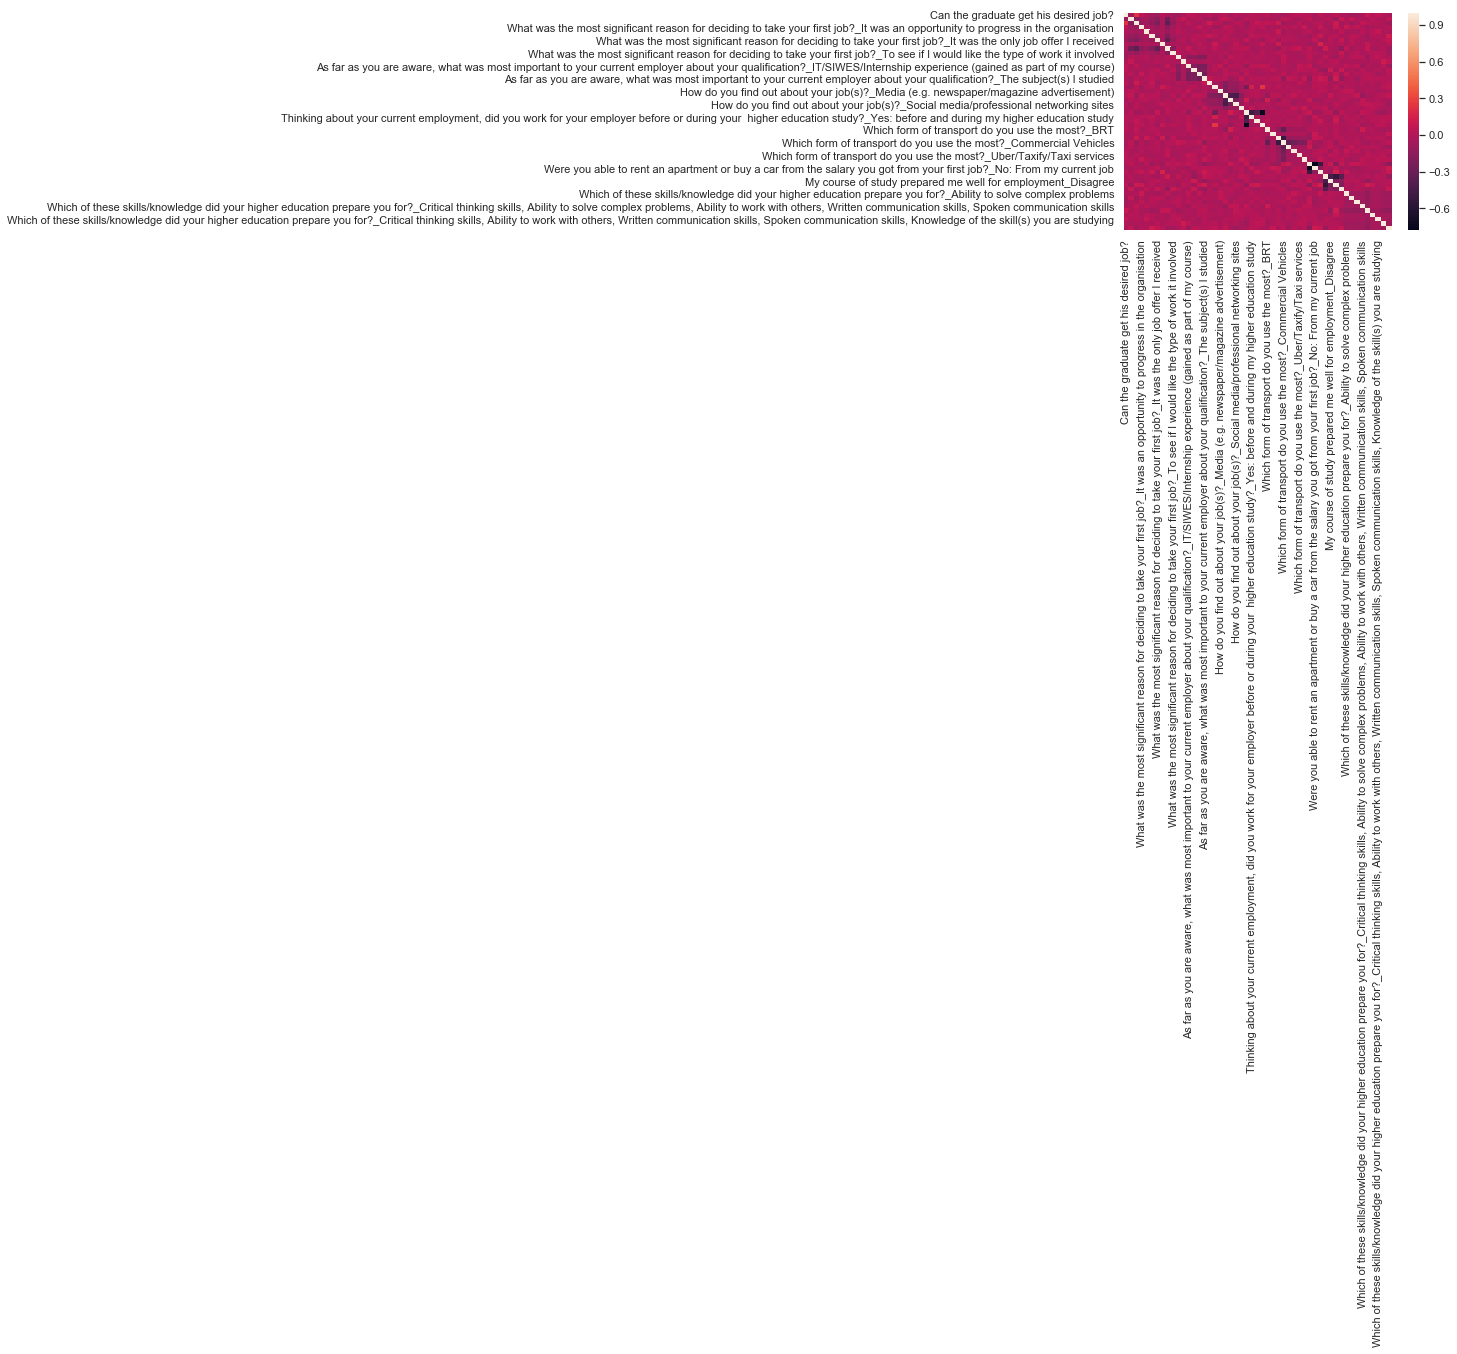

In [30]:

data2 = data2.drop(noise01, axis=1)
data2 = data2.drop(noise02, axis=1)
sns.heatmap(data2.corr())
plt.show()


In [31]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
X_train.shape

(681, 50)

In [33]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

C:\Users\user\Anaconda3\envs\neuralnets\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[152   5]
 [ 61   9]]


In [35]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.71


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82       157
           1       0.64      0.13      0.21        70

   micro avg       0.71      0.71      0.71       227
   macro avg       0.68      0.55      0.52       227
weighted avg       0.69      0.71      0.63       227



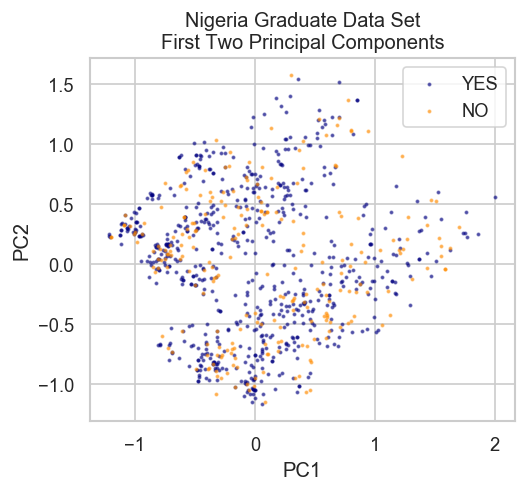

In [37]:
from sklearn.decomposition import PCA
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Nigeria Graduate Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

C:\Users\user\Anaconda3\envs\neuralnets\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


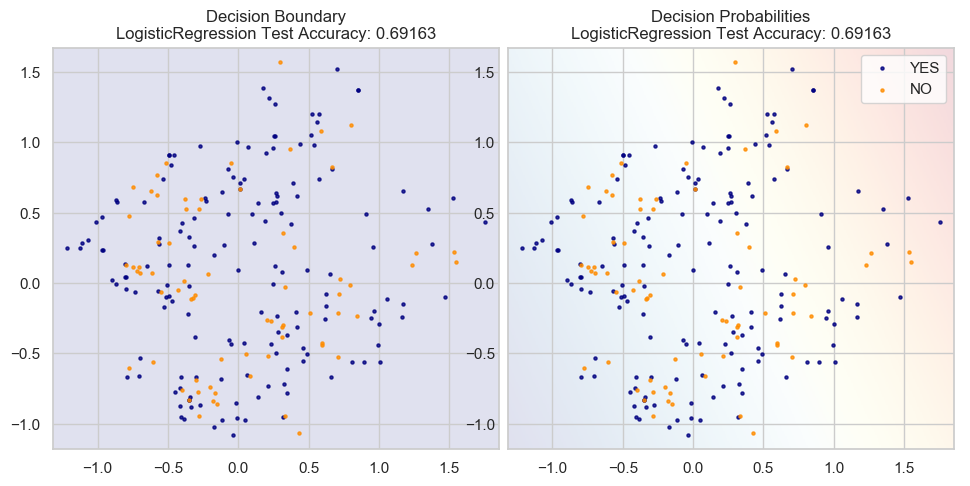

In [38]:
def plot_bank(X, y, fitted_model):
    plt.figure(figsize=(9.8,5), dpi=100)
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)
        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
    plt.tight_layout()
    plt.legend()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
model = LogisticRegression()
model.fit(X_train,y_train)
plot_bank(X_test, y_test, model)
plt.show()